In [1]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [9]:
import tonic
from mix_TimeSurface import TimeSurface
import matplotlib.pyplot as plt
import numpy as np

In [3]:
learningset = tonic.datasets.NMNIST(save_to='../Data/',
                                train=False,
                                transform=None)
loader = tonic.datasets.DataLoader(learningset, shuffle=True)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


In [156]:
target_event = 2000
TS = TimeSurface(R=2,tau=5*10e3,camsize=[34,34])
events, target = next(iter(loader))
flxT = TS.spatpmat.copy()
iev = 0
while iev<target_event:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
                events[0][iev][learningset.ordering.find("y")].item(), \
                events[0][iev][learningset.ordering.find("t")].item(), \
                events[0][iev][learningset.ordering.find("p")].item(),
    flxT[p,x,y] = t
    ts, activ = TS.addevent(x,y,t,p)
    iev+=1

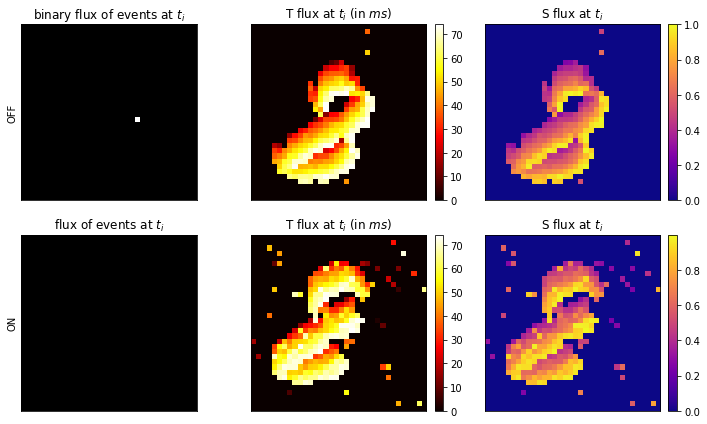

In [157]:
polaritiz = ['OFF','ON']
gamma = 1
fig, axs = plt.subplots(2,3,figsize=(10,6))

Ti = np.zeros(learningset.sensor_size)
singev = axs[1,0].imshow(Ti.T, cmap='gray')
axs[1,0].set_title('flux of events at $t_i$')
axs[1,0].set_ylabel(f'{polaritiz[abs(p-1)]}')
axs[1,0].set_xticks(())
axs[1,0].set_yticks(())

Ti[x,y] = 1
singev = axs[0,0].imshow(Ti.T, cmap='gray')
axs[0,0].set_title('binary flux of events at $t_i$')
axs[0,0].set_ylabel(f'{polaritiz[p]}')
axs[0,0].set_xticks(())
axs[0,0].set_yticks(())

for p in [0,1]:
    T = axs[p,1].imshow(flxT[p].T*1e-3, cmap='hot')
    axs[p,1].set_title('T flux at $t_i$ (in $ms$)')
    axs[p,1].set_xticks(())
    axs[p,1].set_yticks(())
    plt.colorbar(T, ax=axs[p,1], fraction=0.046, pad=0.04);
    
    S = axs[p,2].imshow(TS.spatpmat[p].T, cmap=plt.cm.plasma)
    axs[p,2].set_title('S flux at $t_i$')
    axs[p,2].set_xticks(())
    axs[p,2].set_yticks(())
    plt.colorbar(S, ax=axs[p,2], fraction=0.046, pad=0.04);
    
fig.tight_layout()